In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

In [52]:
data=pd.read_csv("birds.csv")
data.head()

,gender,body_mass,beak_length,beak_depth,fin_length,bird category
0,male,3750,39.1,18.7,181,A
1,female,3800,39.5,17.4,186,A
2,female,3250,40.3,18.0,195,A
3,female,3500,39.6,17.7,186,A
4,female,3450,36.7,19.3,193,A


## Visualization


<Axes: xlabel='fin_length', ylabel='Count'>

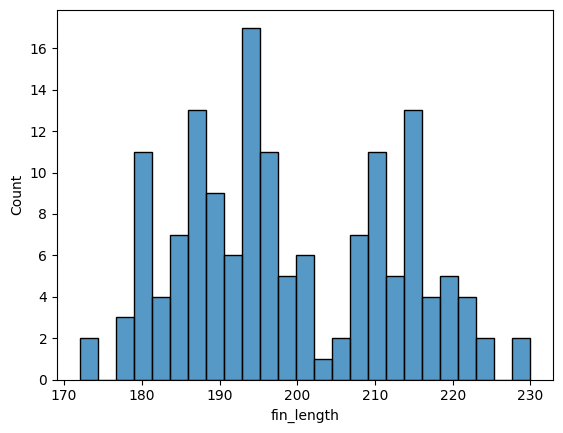

In [53]:
sns.histplot(data['fin_length'],bins=25)

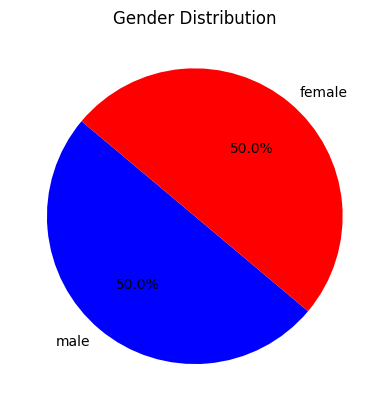

In [54]:
gender_counts = data['gender'].value_counts()

# Plot pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Gender Distribution')
plt.show()

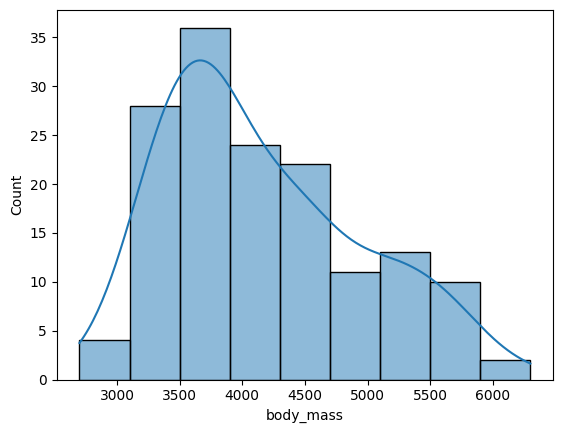

In [55]:
sns.histplot(data['body_mass'],kde=True) # right skewed
plt.show()

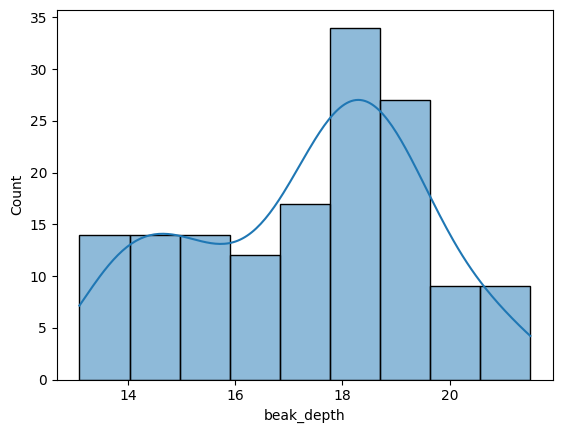

In [56]:
sns.histplot(data['beak_depth'],kde=True) # left skewed
plt.show()

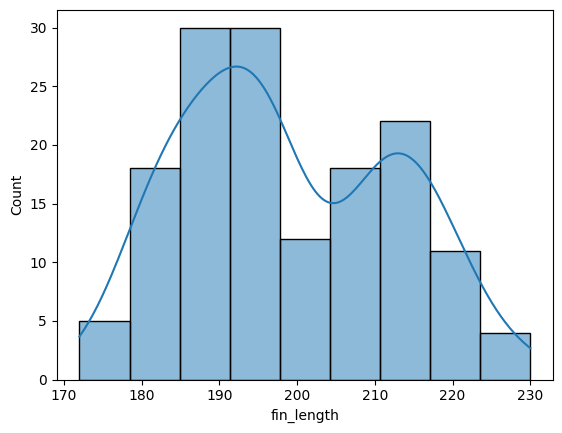

In [57]:
sns.histplot(data['fin_length'],kde=True) 
plt.show()

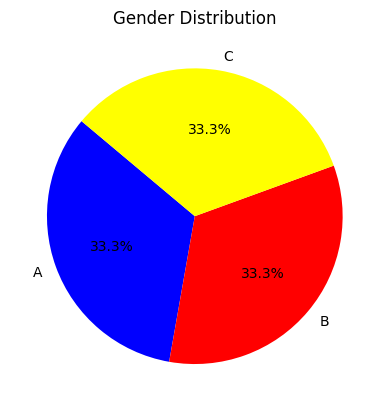

In [58]:
Category_counts = data['bird category'].value_counts()
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%', colors=['blue', 'red','yellow'], startangle=140)
plt.title('Gender Distribution')
plt.show()

In [59]:
data.shape # (150, 6)
data.isnull().sum() #6 nulls in gender , we have to encode the gender and category
gender_mappig={'male':0,'female':1}
data["gender"]=data["gender"].replace(gender_mappig)
categories_mapping={'A':0,'B':1,'C':2}
data['bird category'] = data['bird category'].replace(categories_mapping)
(data["gender"]==0).sum()#females=77,male=73
data["gender"] = data["gender"].bfill() #backkfilling the nulls
data.isnull().sum() 

C:\Users\Reem\AppData\Local\Temp\ipykernel_48060\1897908484.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"]=data["gender"].replace(gender_mappig)
C:\Users\Reem\AppData\Local\Temp\ipykernel_48060\1897908484.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['bird category'] = data['bird category'].replace(categories_mapping)


gender           0
body_mass        0
beak_length      0
beak_depth       0
fin_length       0
bird category    0
dtype: int64

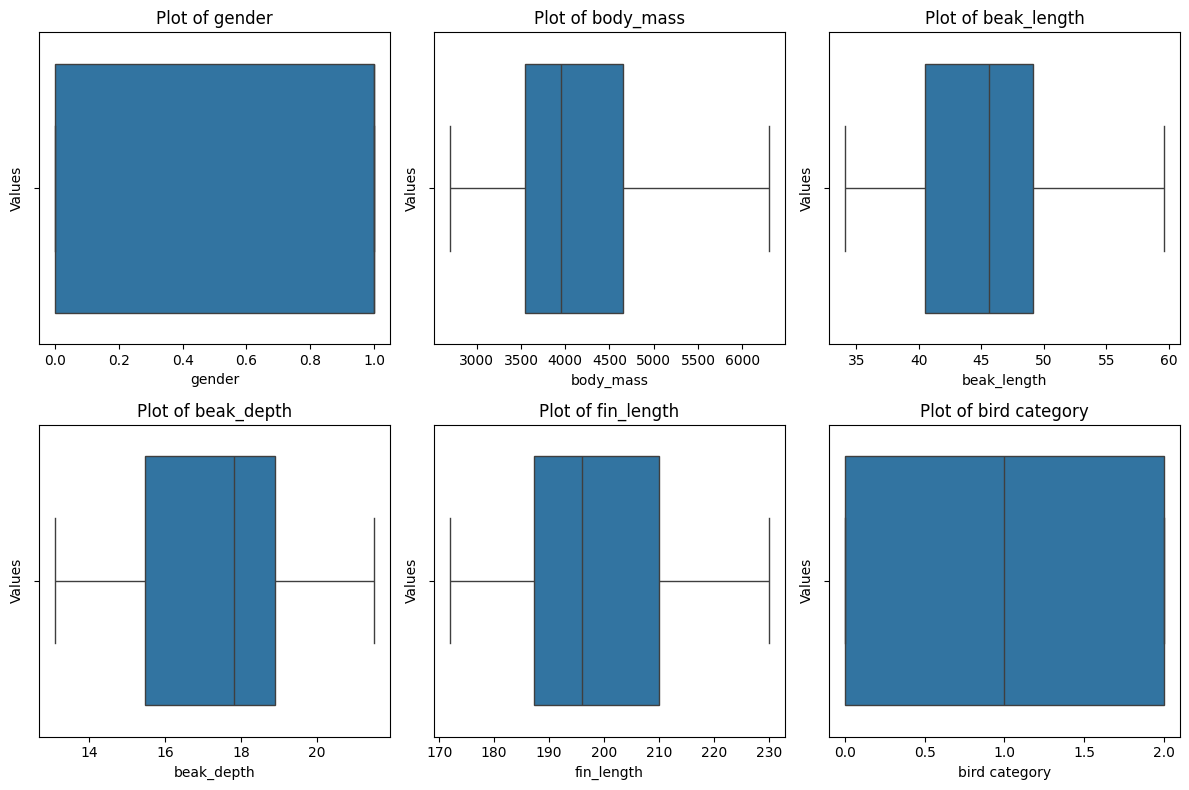

In [60]:
plt.figure(figsize=(12, 8))  # Set figure size
for idx, i in enumerate(data.columns, start=1):
    plt.subplot(2, 3, idx)  # 2 rows, 3 columns
    sns.boxplot(data=data, x=i)
    plt.title(f'Plot of {i}')
    plt.xlabel(i)
    plt.ylabel("Values")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [61]:
scaler=StandardScaler() # to preserve the data shape
data_scaled=data.columns[1:-1]
data[data_scaled]=scaler.fit_transform(data[data_scaled])
print(data.head())

   gender  body_mass  beak_length  beak_depth  fin_length  bird category
0     0.0  -0.521831    -1.097692    0.648822   -1.315727              0
1     1.0  -0.458011    -1.021604    0.038203   -0.948616              0
2     1.0  -1.160025    -0.869429    0.320027   -0.287815              0
3     1.0  -0.840928    -1.002582    0.179115   -0.948616              0
4     1.0  -0.904747    -1.554218    0.930646   -0.434660              0


In [62]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['bird category']).values
y=data['bird category'].values


In [63]:
feature1 = "gender"
feature2 = "body_mass"  
new_df = data[[feature1, feature2]].copy()
new_df["bird category"] = data["bird category"]
new_df

,gender,body_mass,bird category
0,0.0,-0.521831,0
1,1.0,-0.458011,0
2,1.0,-1.160025,0
3,1.0,-0.840928,0
4,1.0,-0.904747,0
...,...,...,...
145,0.0,0.371642,2
146,1.0,-0.968567,2
147,0.0,0.180184,2
148,0.0,-1.160025,2


In [64]:
X=new_df.drop(columns='bird category')
Y=new_df['bird category']
X

,gender,body_mass
0,0.0,-0.521831
1,1.0,-0.458011
2,1.0,-1.160025
3,1.0,-0.840928
4,1.0,-0.904747
...,...,...
145,0.0,0.371642
146,1.0,-0.968567
147,0.0,0.180184
148,0.0,-1.160025


In [65]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: bird category, Length: 150, dtype: int64

In [66]:
def filter_classes(data, class_1, class_2):
    """Filters the dataset to include only two selected classes."""
    filtered_data = data[data['bird category'].isin([class_1, class_2])].reset_index(drop=True) 
    # selects only rows where the 'bird category' column contains either class_1 or class_2.
    # The isin() function checks if each value in the 'bird category' column is in the list [class_1, class_2].
    # reset_index(drop=True) resets the row indices of the filtered dataset, ensuring they are sequential and removing the old indices.
    filtered_data['bird category'] = np.where(
        filtered_data['bird category'] == class_1, -1, 1
    )

    return filtered_data
    
class_1 = 0  
class_2 = 1  
filtered_data = filter_classes(data, class_1, class_2)
print(filtered_data['bird category'].value_counts())

bird category
-1    50
 1    50
Name: count, dtype: int64


In [67]:
def train_split(selected_features,filtered_data):
    # Select a balanced subset of 30 samples from each bird category class
    train_data = filtered_data.groupby('bird category', group_keys=False).apply(lambda x: x.sample(n=30, random_state=42)) 
    if 'bird category' not in selected_features:
        selected_features.append('bird category')
    train_data = train_data[selected_features]
    test_data = filtered_data[selected_features].drop(train_data.index)
    X_train = train_data.drop(columns=['bird category']) 
    y_train = train_data['bird category']  
    X_test = test_data.drop(columns=['bird category'])
    y_test = test_data['bird category']  
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
    return X_train,y_train,X_test,y_test
selected_features = ['gender', 'beak_length'] 
# train_split(selected_features,filtered_data) 
X_train,y_train,X_test,y_test=train_split(selected_features,filtered_data) 
print(X_train,y_train,X_test,y_test)


X_train shape: (60, 2), X_test shape: (40, 2)
y_train shape: (60,), y_test shape: (40,)
    gender  beak_length
13     0.0    -1.192802
39     0.0    -0.964538
30     1.0    -1.021604
45     0.0    -1.002582
17     0.0    -0.450946
48     1.0    -1.687372
26     0.0    -0.812363
25     1.0    -1.820525
32     1.0    -1.021604
19     0.0     0.214821
12     1.0    -0.717253
4      1.0    -1.554218
37     1.0    -0.508012
8      1.0    -2.048788
3      1.0    -1.002582
6      1.0    -1.135736
41     0.0    -0.774319
46     0.0    -0.717253
47     1.0    -1.402043
15     1.0    -1.573240
9      1.0    -0.546056
16     1.0    -1.173780
24     0.0    -1.154758
34     1.0    -1.611284
31     0.0    -1.459109
0      0.0    -1.097692
44     1.0    -1.497152
27     1.0    -0.831385
33     0.0    -0.755297
5      0.0    -1.059648
63     0.0     0.671347
89     0.0     0.728413
80     0.0     0.462106
95     1.0    -0.241705
67     0.0     0.823523
98     1.0     0.005580
76     0.0    -0.070508


C:\Users\Reem\AppData\Local\Temp\ipykernel_48060\3910194382.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = filtered_data.groupby('bird category', group_keys=False).apply(lambda x: x.sample(n=30, random_state=42))


In [68]:
y_train.value_counts()

bird category
-1    30
 1    30
Name: count, dtype: int64

## SLP

In [69]:
class SLP:
    def __init__(self, learning_rate=0.01, epochs=100, Abias=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.Abias = Abias
        self.bias = 0 if self.Abias else None # else 1 ?
        self.weights = None  

    def train(self, X_train, y_train):
        number_of_samples, number_of_features = X_train.shape
        self.weights = np.random.uniform(0, 0.5, size=number_of_features) 
        #If number_of_features = 3, then np.random.uniform(0, 0.5, size=3) might generate something like [0.12, 0.34, 0.25]

        for epoch in range(self.epochs):
            correct = 0
            for i in range(number_of_samples):
                Net_input = np.dot(X_train.iloc[i, :], self.weights) + (self.bias if self.Abias else 0)
                Y_prediction = 1 if Net_input > 0 else -1 #signum
                error = y_train.iloc[i] - Y_prediction 
                self.weights += self.learning_rate * error * X_train.iloc[i, :] #update weights
                if self.Abias:
                    self.bias += self.learning_rate * error

                if error == 0:
                    correct += 1
            
            accuracy = correct / number_of_samples * 100
            # print(f"Epoch {epoch+1}/{self.epochs} - SLP Training Accuracy: {accuracy:.2f}%")
            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}- SLP Training Accuracy: {accuracy:.2f}%")

    def test(self, X_test, y_test):
        number_of_samples = X_test.shape[0]
        correct = 0
        for i in range(number_of_samples):
            Net_input = np.dot(X_test.iloc[i, :], self.weights) + (self.bias if self.Abias else 0)
            Y_prediction = 1 if Net_input > 0 else -1
        
            if Y_prediction == y_test.iloc[i]:
                correct += 1

        accuracy = correct / number_of_samples * 100
        print(f"SLP Test Accuracy: {accuracy:.2f}%")
    def predict(self, X):
       X = np.array(X)
       Net_input = np.dot(X, self.weights) + (self.bias if self.Abias else 0)
       predicted_class = np.where(Net_input > 0, 1, -1)
       class_original= class_1 if predicted_class==-1 else class_2
       return class_original

model = SLP(learning_rate=0.000005, epochs=800, Abias=True)
model.train(X_train, y_train)
model.test(X_test, y_test)
test=np.array([0,-1.1928016115293976])
print('the class predicted',model.predict(test))



Epoch 1/800- SLP Training Accuracy: 88.33%
Epoch 11/800- SLP Training Accuracy: 88.33%
Epoch 21/800- SLP Training Accuracy: 88.33%
Epoch 31/800- SLP Training Accuracy: 88.33%
Epoch 41/800- SLP Training Accuracy: 88.33%
Epoch 51/800- SLP Training Accuracy: 88.33%
Epoch 61/800- SLP Training Accuracy: 88.33%
Epoch 71/800- SLP Training Accuracy: 88.33%
Epoch 81/800- SLP Training Accuracy: 88.33%
Epoch 91/800- SLP Training Accuracy: 88.33%
Epoch 101/800- SLP Training Accuracy: 88.33%
Epoch 111/800- SLP Training Accuracy: 88.33%
Epoch 121/800- SLP Training Accuracy: 88.33%
Epoch 131/800- SLP Training Accuracy: 88.33%
Epoch 141/800- SLP Training Accuracy: 88.33%
Epoch 151/800- SLP Training Accuracy: 88.33%
Epoch 161/800- SLP Training Accuracy: 88.33%
Epoch 171/800- SLP Training Accuracy: 88.33%
Epoch 181/800- SLP Training Accuracy: 88.33%
Epoch 191/800- SLP Training Accuracy: 88.33%
Epoch 201/800- SLP Training Accuracy: 88.33%
Epoch 211/800- SLP Training Accuracy: 88.33%
Epoch 221/800- SLP Tr

In [70]:
model.weights

gender         0.218090
beak_length    0.269924
Name: 13, dtype: float64

## Adaline

In [71]:
#different from the SLP as here there is Cost Function that is calc there as simple error
#implement gradient descent
class Adaline:
  def __init__(self, learning_rate=0.01, epochs=100, Abias=True, MSE_thres=0.2):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.Abias = Abias
    self.bias = 0 if self.Abias else None # else 1 ?
    self.weights = None  
    self.losses = []  #loss after avg
    self.MSE_thres=MSE_thres

  def train(self, X_train, y_train):
    number_of_samples, number_of_features = X_train.shape
    # self.weights = np.random.randn(number_of_features) * 0.01
    self.weights = np.random.uniform(0, 0.5, size=number_of_features)

    #If number_of_features = 3, then np.random.uniform(0, 0.5, size=3) might generate something like [0.12, 0.34, 0.25]

    for epoch in range(self.epochs):
      correct = 0
      # losses_epoch = []
      losses_epoch=0
      for i in range(number_of_samples):
        linear_output = np.dot(X_train.iloc[i, :], self.weights) + (self.bias if self.Abias else 0)
        Y_prediction = 1 if linear_output > 0 else -1 
        error = y_train.iloc[i] - linear_output # loss
        #update the weights and bias
        self.weights += self.learning_rate * error * X_train.iloc[i, :] 
        if self.Abias:
          self.bias += self.learning_rate * error
        losses_epoch+=(error**2) #cost function
         # Check if prediction is correct
        if Y_prediction == y_train.iloc[i]:
            correct += 1
      # losses_epoch(list): kol sample
      # mean_loss(variable): avg el losses_epoch -> for one epoch
      # losses(list): contains all the mean_loss of epochs
      mean_loss=(losses_epoch)/number_of_samples
      self.losses.append(mean_loss)
      accuracy = correct / number_of_samples * 100
      # print(f"Epoch {epoch+1}/{self.epochs},  Loss: {mean_loss:.4f} - Training Accuracy: {accuracy:.2f}%")
      if epoch % 10 == 0 or mean_loss <= self.MSE_thres:
        print(f"Epoch {epoch+1}/{self.epochs}, Loss: {mean_loss:.4f} - Adaline Training Accuracy: {accuracy:.2f}%")

      #stopping condition of the MSE
      if mean_loss<= self.MSE_thres:
        break
  
  # def test(self, X_test, y_test):
  #   number_of_samples = X_test.shape[0]
  #   correct = 0
  #   for i in range(number_of_samples):
  #     linear_output = np.dot(X_test.iloc[i, :], self.weights) + (self.bias if self.Abias else 0)
  #      # Check if prediction is correct
  #     Y_prediction = 1 if linear_output > 0 else -1
  #     if Y_prediction == y_test.iloc[i]:
  #       correct += 1
  #   accuracy = correct / number_of_samples * 100
  #   print(f"Adaline Test Accuracy: {accuracy:.2f}%")

  def test(self, X_test, y_test):
    number_of_samples = X_test.shape[0]
    correct = 0
    confusion_matrix = np.zeros((2, 2)) 
    for i in range(number_of_samples):
      linear_output = np.dot(X_test.iloc[i, :], self.weights) + (self.bias if self.Abias else 0)
      Y_prediction = 1 if linear_output > 0 else -1
      actual_label = y_test.iloc[i]
      if Y_prediction == y_test.iloc[i]:
        correct += 1
        # Actual label
        
        # Update confusion matrix
      if Y_prediction == 1 and actual_label == 1:
          confusion_matrix[0, 0] += 1  # True Positive (TP)
      elif Y_prediction == -1 and actual_label == 1:
          confusion_matrix[0, 1] += 1  # False Negative (FN)
      elif Y_prediction == 1 and actual_label == -1:
          confusion_matrix[1, 0] += 1  # False Positive (FP)
      else:
          confusion_matrix[1, 1] += 1  # True Negative (TN)

    accuracy = correct / number_of_samples * 100
    return confusion_matrix,accuracy


  def predict(self, X):
    X = np.array(X)
    Net_input = np.dot(X, self.weights) + (self.bias if self.Abias else 0)
    predicted_class = np.where(Net_input > 0, 1, -1)
    # class_original= class_1 if predicted_class==-1 else class_2
    return predicted_class

In [72]:
model = Adaline(learning_rate=0.000005, epochs=800, Abias=True,MSE_thres=0.2)
model.train(X_train, y_train)
conf, acc= model.test(X_test, y_test)
print(conf, acc)

Epoch 1/800, Loss: 0.7977 - Adaline Training Accuracy: 71.67%
Epoch 11/800, Loss: 0.7948 - Adaline Training Accuracy: 71.67%
Epoch 21/800, Loss: 0.7919 - Adaline Training Accuracy: 71.67%
Epoch 31/800, Loss: 0.7891 - Adaline Training Accuracy: 73.33%
Epoch 41/800, Loss: 0.7862 - Adaline Training Accuracy: 73.33%
Epoch 51/800, Loss: 0.7834 - Adaline Training Accuracy: 75.00%
Epoch 61/800, Loss: 0.7806 - Adaline Training Accuracy: 76.67%
Epoch 71/800, Loss: 0.7778 - Adaline Training Accuracy: 76.67%
Epoch 81/800, Loss: 0.7750 - Adaline Training Accuracy: 76.67%
Epoch 91/800, Loss: 0.7723 - Adaline Training Accuracy: 78.33%
Epoch 101/800, Loss: 0.7696 - Adaline Training Accuracy: 78.33%
Epoch 111/800, Loss: 0.7669 - Adaline Training Accuracy: 78.33%
Epoch 121/800, Loss: 0.7642 - Adaline Training Accuracy: 78.33%
Epoch 131/800, Loss: 0.7615 - Adaline Training Accuracy: 78.33%
Epoch 141/800, Loss: 0.7589 - Adaline Training Accuracy: 78.33%
Epoch 151/800, Loss: 0.7562 - Adaline Training Accu

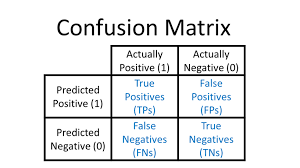

In [73]:
print(model.weights)

gender         0.293108
beak_length    0.335538
Name: 13, dtype: float64


- after computing the y return to update the weights
- before goint to the next epoch we need to calc the MSE for every sample which will decide whether to go to second epoch or not
- if accepted error >= the error : break else go to the next error

- our thought:
    - error: MSE
    - epochs is another stopping condition if the MSE didnt got reached

loop epochs:
    loop samples
        calc MSE 
        
    if accepted error >= the error : break 
    else: go to the next error


In [74]:
# import matplotlib.pyplot as plt

# def plot_decision_boundary(model, X_train, y_train):
#     # Only works if X_train has 2 features
#     if X_train.shape[1] != 2:
#         print("Plotting decision boundary is only supported for 2D data.")
#         return

#     x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
#     y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

#     # Generate grid points
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                          np.linspace(y_min, y_max, 100))

#     # # Flatten and create predictions
#     # grid = np.c_[xx.ravel(), yy.ravel()]
#     # Z = model.predict(grid).reshape(xx.shape)

#     # # Plot decision boundary
#     # plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
#     W_i, W_j = model.weights[0], model.weights[1]
#     b = model.bias if model.Abias else 0
    
#     # Solving for X_j (Feature 2)
#     if W_i != 0:
#         boundary_y = -(W_j * xx + b) / W_i

#     # Plot decision boundary
#     plt.contourf(xx, yy, boundary_y > yy, alpha=0.3, cmap=plt.cm.coolwarm)
    
#     # Scatter plot for actual data
#     plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

#     # Scatter plot of training data
#     plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.title("Adaline Decision Boundary")
#     plt.show()

In [75]:
def plot_decision_boundary(model, X, y):
    # Extract feature limits
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Generate a range of x values
    x_values = np.linspace(x_min, x_max, 100)

    # Extract weights and bias
    W_i, W_j = model.weights[0], model.weights[1]
    b = model.bias if hasattr(model, 'bias') else 0

    # Compute decision boundary (X_j)
    y_values = -(W_i * x_values + b) / W_j  # From equation: W_i * X_i + W_j * X_j + b = 0

    # Plot decision boundary
    plt.plot(x_values, y_values, 'k--', linewidth=2, label="Decision Boundary")

    # Plot data points with different colors
    plt.scatter(X.iloc[:, 0][y == -1], X.iloc[:, 1][y == -1], color='blue', marker='o', label='Class -1')
    plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], color='red', marker='s', label='Class 1')

    # Labels and title
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.title("Adaline Decision Boundary")
    plt.legend()
    plt.show()


C:\Users\Reem\AppData\Local\Temp\ipykernel_48060\3965908265.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  W_i, W_j = model.weights[0], model.weights[1]


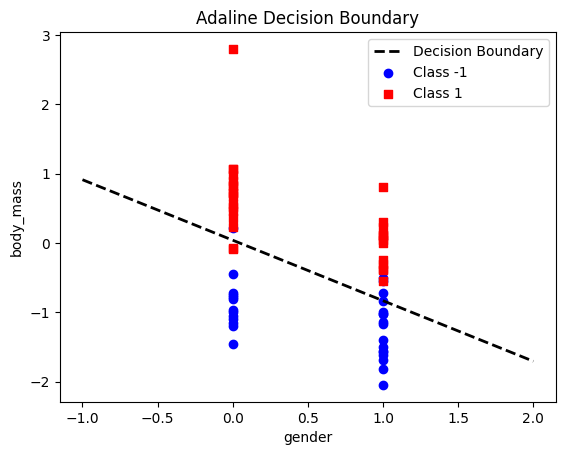

In [76]:
plot_decision_boundary(model, X_train, y_train)

In [77]:
print(y_test.value_counts())

bird category
-1    20
 1    20
Name: count, dtype: int64
